<a href="https://colab.research.google.com/github/nishuchy/AI-works/blob/main/Dataset_IMDB_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Acquisition

In [3]:
# Colab Code Snippet (from the notebook)
import pandas as pd

# Upload the 'IMDB Dataset.csv' file to your Colab environment
# files.upload() if you are uploading manually
df = pd.read_csv('/content/IMDB Dataset.csv')
print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


2. Exploratory Data Analysis (EDA)

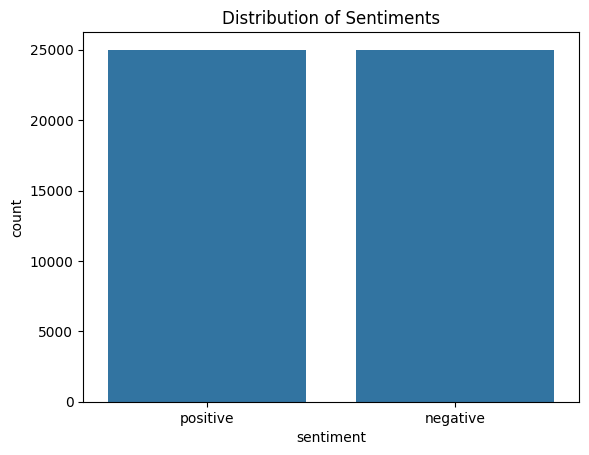

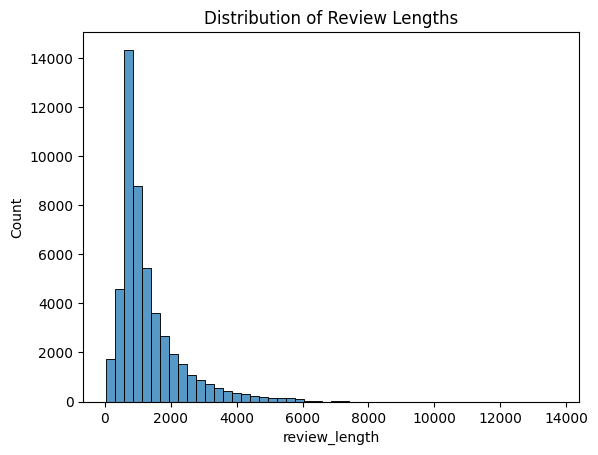

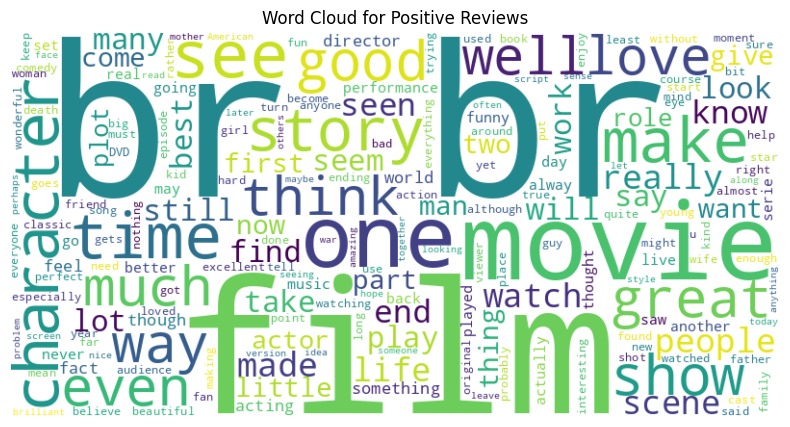

In [4]:
# Colab Code Snippet (from the notebook)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment Distribution
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Review Length
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

# Word Cloud for Positive Reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])
wordcloud_pos = WordCloud(width=800, height=400,
background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


3. Data Preprocessing & Cleaning

In [7]:
# Colab Code Snippet (from the notebook)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
  text = text.lower() # Lowercasing
  text = re.sub(r'<.*?>', '', text) # Remove HTML tags
  text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
  words = nltk.word_tokenize(text) # Tokenization
  words = [word for word in words if word not in stop_words] # Stop word removal
  words = [lemmatizer.lemmatize(word) for word in words] # Lemmatization
  return " ".join(words)
df['cleaned_review'] = df['review'].apply(clean_text)
print(df[['review', 'cleaned_review']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


4. Feature Engineering

In [10]:
# Colab Code Snippet (from the notebook)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = df['cleaned_review']
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0) # Convert sentiment to numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CountVectorizer
vectorizer_count = CountVectorizer(max_features=5000) # Limit features to 5000
X_train_count = vectorizer_count.fit_transform(X_train)
X_test_count = vectorizer_count.transform(X_test)

# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=5000) # Limit features to 5000
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

print("Shape of X_train_count:", X_train_count.shape)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)

Shape of X_train_count: (40000, 5000)
Shape of X_train_tfidf: (40000, 5000)


5. Model Training

In [ ]:
# Colab Code Snippet (from the notebook)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC()
}

results = {}

# Training with CountVectorizer features
print("--- Training with CountVectorizer Features ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_count, y_train)
    y_pred = model.predict(X_test_count)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[f'{name}_CountVec'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Training with TfidfVectorizer features
print("\n--- Training with TfidfVectorizer Features ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[f'{name}_Tfidf'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

--- Training with CountVectorizer Features ---

Training Logistic Regression...
  Accuracy: 0.8723
  Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

  Confusion Matrix:
[[4292  669]
 [ 608 4431]]

Training Multinomial Naive Bayes...
  Accuracy: 0.8449
  Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

  Confusion Matrix:
[[4210  751]
 [ 800 4239]]

Training Support Vector Machine...
  Accuracy:

6. Performance Evaluation

In [ ]:
# Colab Code Snippet (from the notebook)
# Displaying the results in a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("\n--- Model Performance Summary ---")
print(results_df.sort_values(by='F1-Score', ascending=False))

7. Prediction and Decision Making

In [ ]:
# Colab Code Snippet (from the notebook)
import joblib

# Choose the best performing model (e.g., Logistic Regression with TF-IDF)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_tfidf, y_train)

# Save the model and vectorizer
joblib.dump(best_model, 'sentiment_model.pkl')
joblib.dump(vectorizer_tfidf, 'tfidf_vectorizer.pkl')

print("\nModel and Vectorizer saved successfully.")

# Load them back (in a new session or script)
loaded_model = joblib.load('sentiment_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example prediction
new_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "What a terrible film. I wasted my time and money.",
    "It was okay, not great, not bad. Just very average."
]

def predict_sentiment(reviews, model, vectorizer, clean_func):
    cleaned_reviews = [clean_func(review) for review in reviews]
    vectorized_reviews = vectorizer.transform(cleaned_reviews)
    predictions = model.predict(vectorized_reviews)
    sentiments = ['positive' if p == 1 else 'negative' for p in predictions]
    for i, review in enumerate(reviews):
        print(f"Review: '{review}'\nPredicted Sentiment: {sentiments[i]}\n")

print("\n--- Making Predictions on New Reviews ---")
predict_sentiment(new_reviews, loaded_model, loaded_vectorizer, clean_text)